In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
from scipy.optimize import curve_fit
plt.style.use(["science","bright","grid"])

def exp_func(x, a, b, c):
    return -a*np.exp(-b*x) + c
def exp_func2(x, a, b, c, d):
    return a*np.exp(b*(x-c)) + d

In [8]:
path    = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
N_vals  = [3,5,7,9,11,13]
data    = {N : pd.read_csv(f"{path}Nx={N}_Ny={N}_Nz=1_Ne=8.csv") for N in N_vals}
x_val   = data[5]['E0'].values*1000
t_val   = np.arange(len(x_val))*1e-10*1e9

In [9]:
taus    = []
starts  = [1500,1500,1500,1550,1700,1800]
stops   = [1550,1550,1600,1700,2000,2500]

for i, N in enumerate(N_vals):
    diff    = stops[i]-starts[i]
    x_fit   = t_val[:diff]
    y_fit   = data[N].loc[starts[i]:(stops[i]-1),'Current'].values*1000
    p, _    = curve_fit(exp_func, x_fit, y_fit, maxfev=2000)
    taus.append(p[1])
taus = np.array(taus)
p, _ = curve_fit(exp_func2, N_vals, 1/taus, p0=[1,2,0,0])

/tmp/ipykernel_6277/1757957816.py:12: RuntimeWarning: overflow encountered in exp
  return -a*np.exp(-b*x) + c


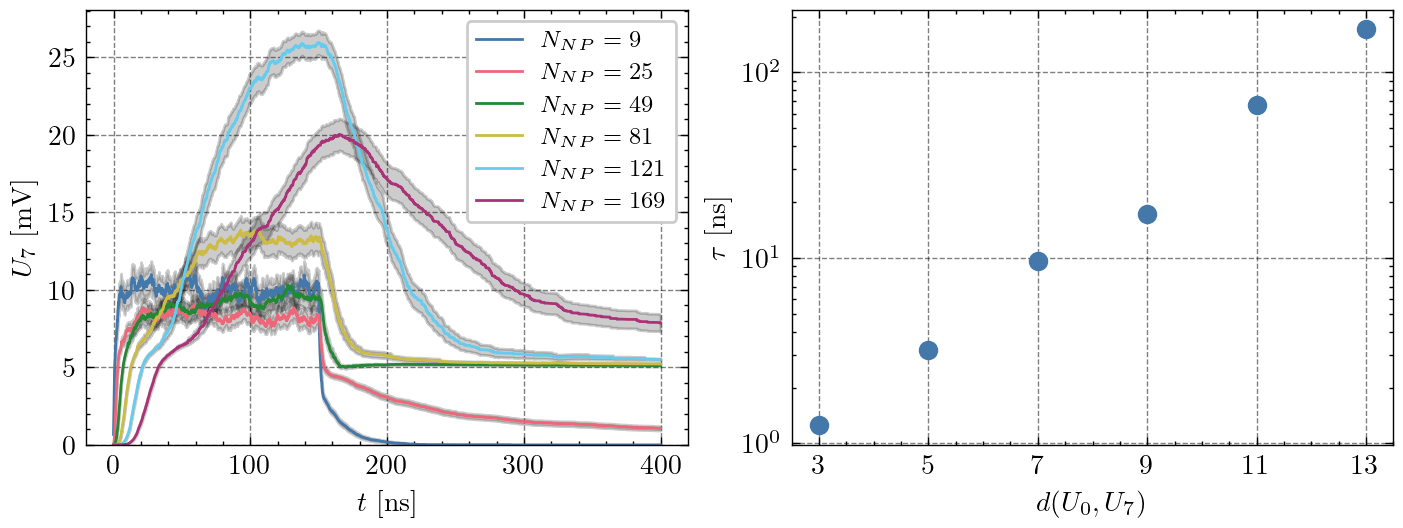

In [12]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)

for N in N_vals:

    y_val   = data[N]['Current'].values*1000
    y_val_e = data[N]['Error'].values*1000
    # y_val   = nanonets_utils.standard_scale(data[N]['Current'].values)
    ax.plot(t_val, y_val, label='$N_{NP} = '+f'{N**2}$')
    ax.fill_between(t_val, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='upper right', fontsize='small')
ax.set_ylim(0)
# ax2 = ax.twinx()
# ax2.plot(t_val, x_val, color='black')
# ax2.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), 1/taus, 'o')
# ax.plot(np.array(N_vals), exp_func2(N_vals,*p), '-')
ax.set_ylabel("$\\tau$ [ns]")
# ax.set_xlabel("$N_{NP}$")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_yscale('log')
ax.set_xticks(N_vals)

fig.savefig("../plots/step_input_response_and_time_scale.svg", transparent=True)
fig.savefig("../plots/step_input_response_and_time_scale.pdf", transparent=False)

---